In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 


In [2]:
df_players=pd.read_csv('/home/pedrozamboni/Documentos/doutorado/erodes_data_camp/nfl-big-data-bowl-2021/players.csv')
df_plays=pd.read_csv('/home/pedrozamboni/Documentos/doutorado/erodes_data_camp/nfl-big-data-bowl-2021/plays.csv')
df_games=pd.read_csv('/home/pedrozamboni/Documentos/doutorado/erodes_data_camp/nfl-big-data-bowl-2021/games.csv')


In [3]:
df_players

,nflId,height,weight,birthDate,collegeName,position,displayName
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell
...,...,...,...,...,...,...,...
1298,2553798,6-2,235,09/17/1991,Vanderbilt,LS,Andrew East
1299,2556814,6-2,200,05/17/1994,Duke,WR,Max McCaffrey
1300,2552576,78,231,1992-04-25,Oregon State,QB,Sean Mannion
1301,2561469,69,187,1993-03-15,Alabama-Birmingham,CB,Darious Williams


In [4]:
players_height = df_players['height'].str.split('-',expand=True)
players_height.columns = [ 'first', 'second' ]

players_height.loc[(players_height['second'].notnull()), 'first'] \
= players_height[players_height['second'].notnull()]['first'].astype(np.int16) * 12 \
+ players_height[players_height['second'].notnull()]['second'].astype(np.int16)

df_players['height'] = players_height['first']
df_players['height'] = df_players['height'].astype(np.float32)
df_players['height'] /= 12
df_players

,nflId,height,weight,birthDate,collegeName,position,displayName
0,2539334,6.000000,190,1990-09-10,Washington,CB,Desmond Trufant
1,2539653,5.833333,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford
2,2543850,5.750000,186,1991-12-18,Purdue,SS,Ricardo Allen
3,2555162,6.083333,227,1994-11-04,Louisiana State,MLB,Deion Jones
4,2555255,6.250000,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell
...,...,...,...,...,...,...,...
1298,2553798,6.166667,235,09/17/1991,Vanderbilt,LS,Andrew East
1299,2556814,6.166667,200,05/17/1994,Duke,WR,Max McCaffrey
1300,2552576,6.500000,231,1992-04-25,Oregon State,QB,Sean Mannion
1301,2561469,5.750000,187,1993-03-15,Alabama-Birmingham,CB,Darious Williams


In [5]:
for i in range(len(df_players['birthDate'])):
    try:
        if int(df_players['birthDate'][i].split('/')[0]) <=30:
            x=df_players['birthDate'][i].split('/')
            y=x[2]+'/'+x[0]+'/'+x[1]
            df_players['birthDate'][i]=y
    except:
        pass
        
df_players['birthDate'] = pd.to_datetime(df_players['birthDate'], format="%Y/%m/%d")

df_players['age']=df_players['birthDate']
for i in range(len( df_players['birthDate'])):
    today = datetime.date.today()
    df_players['age'][i]=today.year - df_players['birthDate'][i].year - ((today.month, today.day) < (df_players['birthDate'][i].month, df_players['birthDate'][i].day))
df_players['age']=df_players['age'].astype(int)

/home/pedrozamboni/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/pedrozamboni/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/home/pedrozamboni/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._seti

In [6]:
df_players

,nflId,height,weight,birthDate,collegeName,position,displayName,age
0,2539334,6.000000,190,1990-09-10,Washington,CB,Desmond Trufant,30
1,2539653,5.833333,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford,32
2,2543850,5.750000,186,1991-12-18,Purdue,SS,Ricardo Allen,29
3,2555162,6.083333,227,1994-11-04,Louisiana State,MLB,Deion Jones,26
4,2555255,6.250000,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell,27
...,...,...,...,...,...,...,...,...
1298,2553798,6.166667,235,1991-09-17,Vanderbilt,LS,Andrew East,29
1299,2556814,6.166667,200,1994-05-17,Duke,WR,Max McCaffrey,26
1300,2552576,6.500000,231,1992-04-25,Oregon State,QB,Sean Mannion,29
1301,2561469,5.750000,187,1993-03-15,Alabama-Birmingham,CB,Darious Williams,28


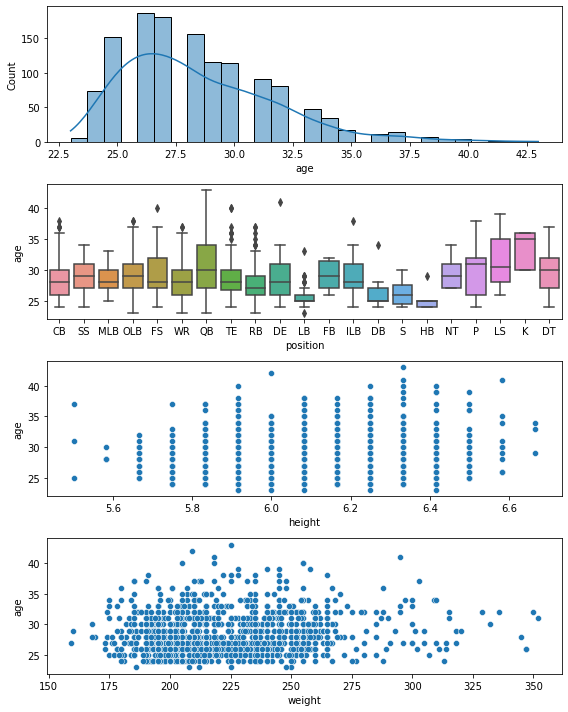

In [7]:
f, axes = plt.subplots(4, 1,figsize=(8, 10))

sns.histplot(df_players['age'],kde=True,ax=axes[0])
sns.boxplot(data=df_players,y='age',x='position',ax=axes[1])
sns.scatterplot(data=df_players,y='age',x='height',ax=axes[2])
sns.scatterplot(data=df_players,y='age',x='weight',ax=axes[3])
plt.tight_layout()

AS posições QB, NT, P, LS, K e Dt apresentam os jogadores com maior media de idade
LB e Hb possuem os jogadores mais novos
Altura e idade nao parecem ser correlacionados
Jogadores com mias de 275 libras tendem a ter menos de 30 anos

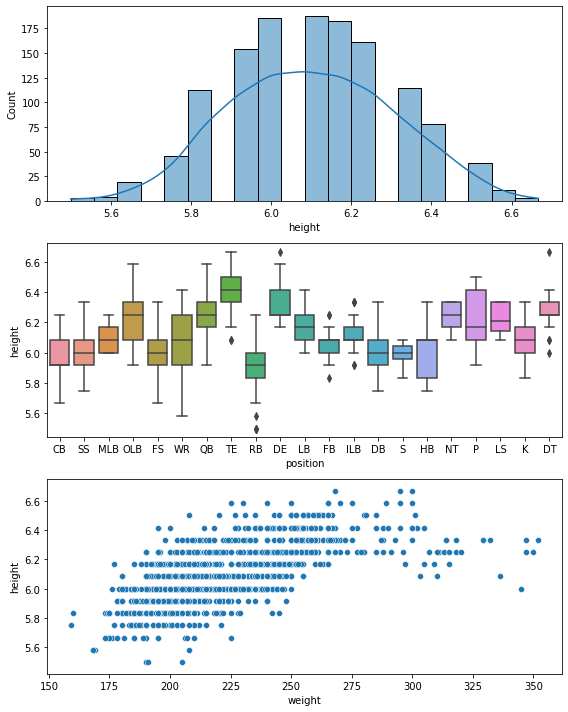

In [8]:
f, axes = plt.subplots(3, 1,figsize=(8, 10))

sns.histplot(df_players['height'],kde=True,ax=axes[0],bins=20)
sns.boxplot(data=df_players,y='height',x='position',ax=axes[1])
sns.scatterplot(data=df_players,y='height',x='weight',ax=axes[2])
plt.tight_layout()

As posições de TE, QB, P, OLB, NT, LS, DT e DE tem maiores alturas
Peso e altura são correlacionados
Jogadreos com mais de 275 tendem a ter altura entre 6 e 6.2

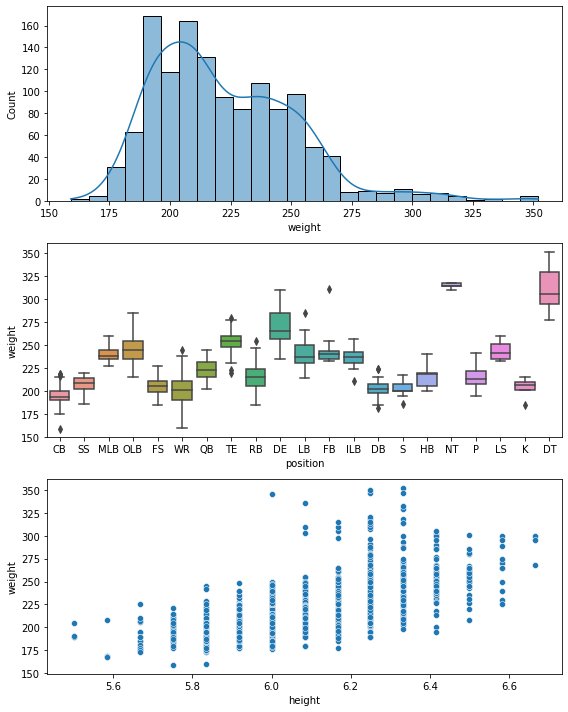

In [9]:
f, axes = plt.subplots(3, 1,figsize=(8, 10))

sns.histplot(df_players['weight'],kde=True,ax=axes[0])
sns.boxplot(data=df_players,y='weight',x='position',ax=axes[1])
sns.scatterplot(data=df_players,y='weight',x='height',ax=axes[2])
plt.tight_layout()

Posições mais pesadas - DE, DT, NT e TE
Posições mais leves - CB, DB, K,SS E WR
Quanto mais alto mais pesado o atleta

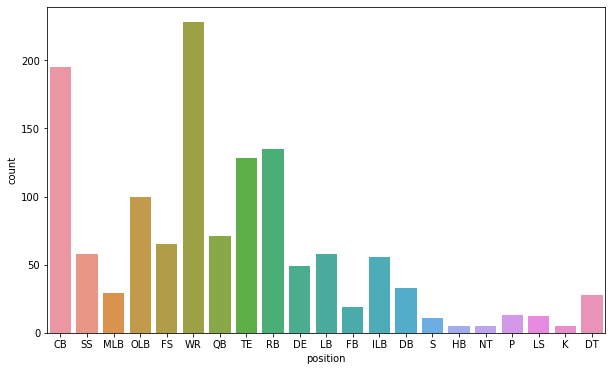

In [10]:
f, axes = plt.subplots(1, 1,figsize=(10, 6))
sns.countplot(x="position", data=df_players)

Wide receiver, cornerback, Tight end, Runnnin back, Outside linebreaker posições mais conuns

In [11]:
df_players.groupby(['position']).mean()

,nflId,height,weight,age
position,,,,
CB,2.418868e+06,5.967521,194.358974,28.210256
DB,2.558176e+06,6.015152,202.181818,25.787879
DE,2.365264e+06,6.321429,270.020408,28.734694
DT,2.223022e+06,6.285714,312.142857,29.928571
FB,2.540765e+06,6.048245,243.684211,29.315789
FS,2.374985e+06,5.988461,204.476923,29.307692
HB,2.555698e+06,6.016667,216.800000,25.400000
ILB,2.464675e+06,6.110119,236.857143,28.767857
K,2.525132e+06,6.083333,203.600000,33.400000


In [12]:
df_plays.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,...,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
0,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,...,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False
1,2018090600,146,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,ATL,play_type_pass,PHI,39,...,0.0,13:10:00,49.0,NaN,NaN,I,0,0,-0.372360,False
2,2018090600,168,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,ATL,play_type_pass,PHI,39,...,0.0,13:05:00,49.0,NaN,NaN,I,0,0,-0.702779,False
3,2018090600,190,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,ATL,play_type_pass,PHI,39,...,0.0,13:01:00,49.0,NaN,NaN,C,33,33,3.047530,False
4,2018090600,256,(10:59) (Shotgun) M.Ryan pass incomplete short...,1,3,1,ATL,play_type_pass,PHI,1,...,0.0,10:59:00,11.0,NaN,NaN,I,0,0,-0.842272,False


In [13]:
df_plays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gameId                  19239 non-null  int64  
 1   playId                  19239 non-null  int64  
 2   playDescription         19239 non-null  object 
 3   quarter                 19239 non-null  int64  
 4   down                    19239 non-null  int64  
 5   yardsToGo               19239 non-null  int64  
 6   possessionTeam          19239 non-null  object 
 7   playType                19239 non-null  object 
 8   yardlineSide            18985 non-null  object 
 9   yardlineNumber          19239 non-null  int64  
 10  offenseFormation        19098 non-null  object 
 11  personnelO              19210 non-null  object 
 12  defendersInTheBox       19177 non-null  float64
 13  numberOfPassRushers     18606 non-null  float64
 14  personnelD              19210 non-null

In [14]:
df_plays.isnull().sum().sort_values(ascending = False)/len(df_plays)

penaltyJerseyNumbers      0.937315
penaltyCodes              0.937315
preSnapVisitorScore       0.033214
absoluteYardlineNumber    0.033214
typeDropback              0.033214
preSnapHomeScore          0.033214
gameClock                 0.033214
numberOfPassRushers       0.032902
yardlineSide              0.013202
offenseFormation          0.007329
defendersInTheBox         0.003223
personnelD                0.001507
personnelO                0.001507
passResult                0.000104
playDescription           0.000000
possessionTeam            0.000000
playId                    0.000000
quarter                   0.000000
down                      0.000000
yardsToGo                 0.000000
isDefensivePI             0.000000
playType                  0.000000
yardlineNumber            0.000000
epa                       0.000000
offensePlayResult         0.000000
playResult                0.000000
gameId                    0.000000
dtype: float64

In [15]:
df_plays = df_plays.drop(columns = ['penaltyJerseyNumbers', 'penaltyCodes'])

In [16]:
df_plays = df_plays.dropna()

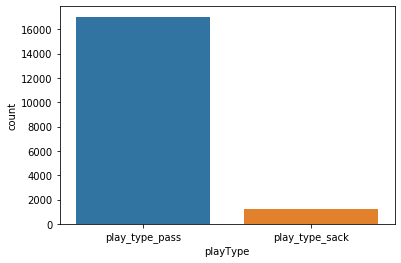

In [20]:
sns.countplot(data=df_plays,x='playType')


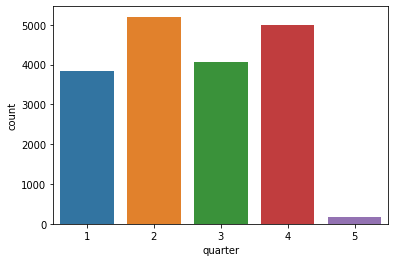

In [22]:
sns.countplot(data=df_plays,x='quarter')

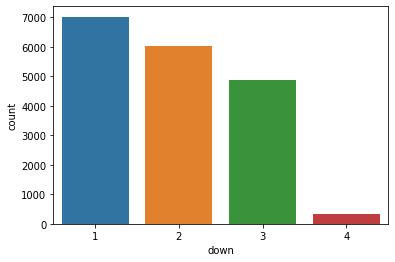

In [24]:
sns.countplot(data=df_plays,x='down')


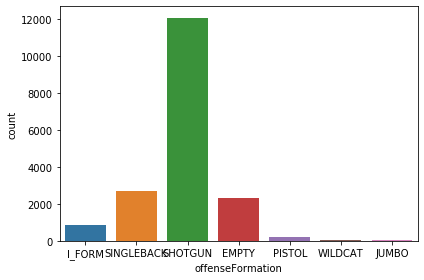

In [33]:
sns.countplot(data=df_plays,x='offenseFormation')
plt.tight_layout()

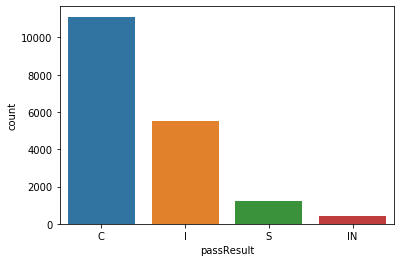

In [46]:
sns.countplot(data=df_plays,x='passResult')


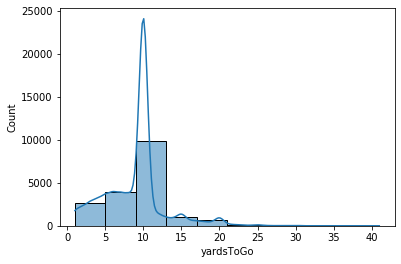

In [29]:
sns.histplot(data=df_plays,x='yardsToGo',kde=True,bins=10)

Como ja era de se espera, parece que as jogadas de ate 10 yard são as mais comuns

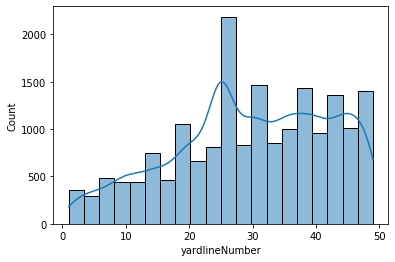

In [31]:
sns.histplot(data=df_plays,x='yardlineNumber',kde=True,bins=20)

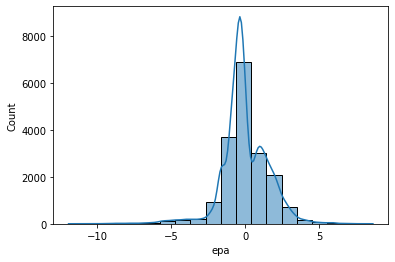

In [39]:
sns.histplot(data=df_plays,x='epa',kde=True,bins=20)

Formações de ataque mais comuns

In [37]:
df_plays['personnelO'].value_counts().reset_index()[0:10]

,index,personnelO
0,"1 RB, 1 TE, 3 WR",13031
1,"1 RB, 2 TE, 2 WR",2625
2,"2 RB, 1 TE, 2 WR",1037
3,"1 RB, 3 TE, 1 WR",386
4,"1 RB, 0 TE, 4 WR",257
5,"0 RB, 1 TE, 4 WR",167
6,"2 RB, 2 TE, 1 WR",157
7,"2 RB, 0 TE, 3 WR",142
8,"6 OL, 1 RB, 1 TE, 2 WR",100
9,"2 QB, 1 RB, 1 TE, 2 WR",54


Defesas mais comuns

In [41]:
df_plays['personnelD'].value_counts().reset_index()[0:10]

,index,personnelD
0,"4 DL, 2 LB, 5 DB",6313
1,"3 DL, 3 LB, 5 DB",2945
2,"4 DL, 3 LB, 4 DB",2314
3,"2 DL, 4 LB, 5 DB",2017
4,"4 DL, 1 LB, 6 DB",1049
5,"3 DL, 2 LB, 6 DB",988
6,"2 DL, 3 LB, 6 DB",870
7,"3 DL, 4 LB, 4 DB",700
8,"1 DL, 4 LB, 6 DB",301
9,"1 DL, 5 LB, 5 DB",251


/home/pedrozamboni/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


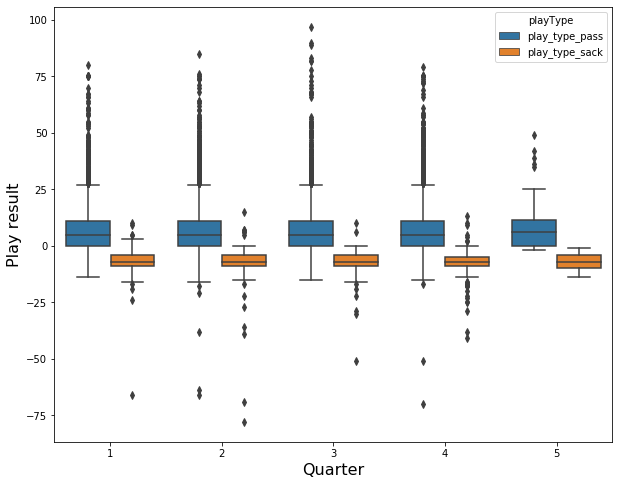

In [45]:
fig,ax = plt.subplots(figsize=(10,8))

sns.boxplot(df_plays['quarter'],df_plays['playResult'],hue=df_plays['playType'])
plt.xlabel("Quarter", fontsize = 16)
plt.ylabel("Play result", fontsize = 16)
plt.show()

Play type tipo pass tem maior numero de yardas ganhas do que sack 
Não parece haver diferença entre os quartos

/home/pedrozamboni/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


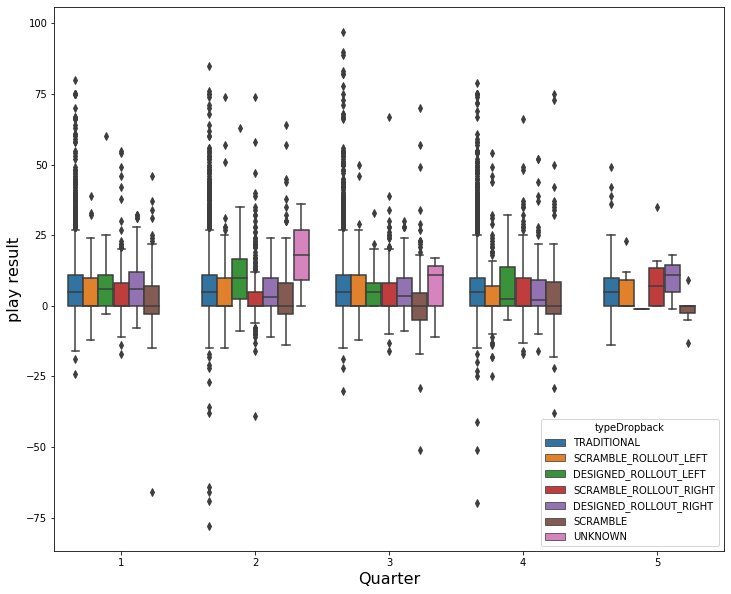

In [48]:
fig,ax = plt.subplots(figsize=(12,10))

sns.boxplot(df_plays['quarter'],df_plays['playResult'],hue=df_plays['typeDropback'])
plt.xlabel("Quarter", fontsize = 16)
plt.ylabel("play result", fontsize = 16)
plt.show()

Dropback tradicional - apresenta os mesmos resultados em todos os quartos
Scramble apetentemente da piores resultados em todos os quartos
Desgined rollout left e right apresnetam resultaso similares
Unkown dropback da maiores ganhos 

/home/pedrozamboni/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


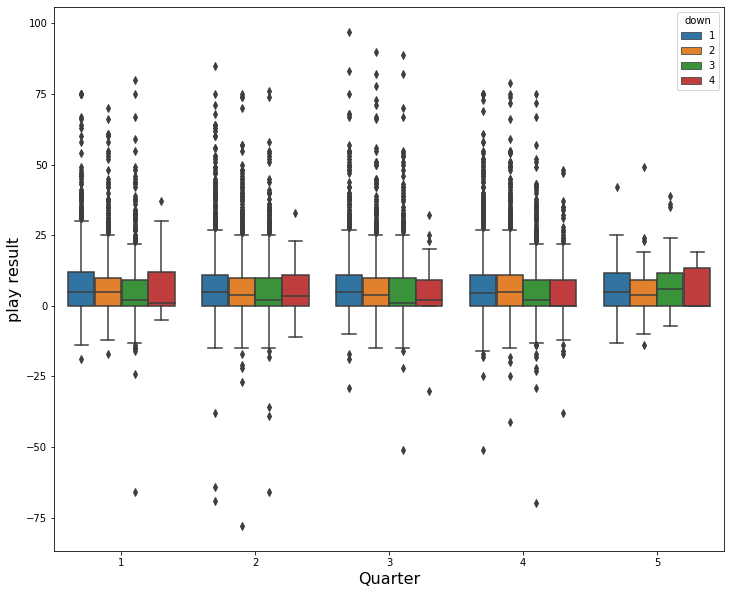

In [49]:
fig,ax = plt.subplots(figsize=(12,10))

sns.boxplot(df_plays['quarter'],df_plays['playResult'],hue=df_plays['down'])
plt.xlabel("Quarter", fontsize = 16)
plt.ylabel("play result", fontsize = 16)
plt.show()

Nos primeiros e segundos down de cada quarto são ganhos mai jardas
No 3 down se ganha menos - ja esperado

/home/pedrozamboni/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


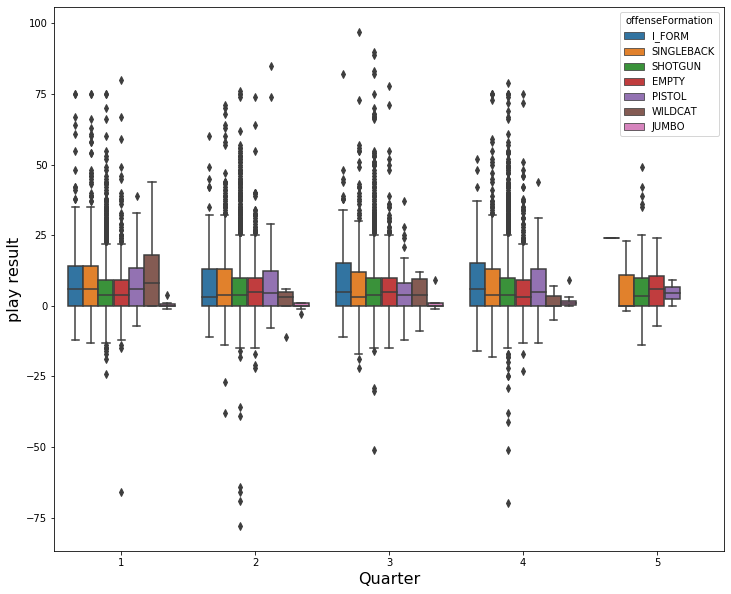

In [50]:
fig,ax = plt.subplots(figsize=(12,10))

sns.boxplot(df_plays['quarter'],df_plays['playResult'],hue=df_plays['offenseFormation'])
plt.xlabel("Quarter", fontsize = 16)
plt.ylabel("play result", fontsize = 16)
plt.show()

I-form e singleback são muito parecidas em ganho de jardas por quarto
Shotgun e empty são parecidas em ganho de jardar por quarto
Wildcat aparentemnte da bons resultados no 1 quarto

/home/pedrozamboni/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


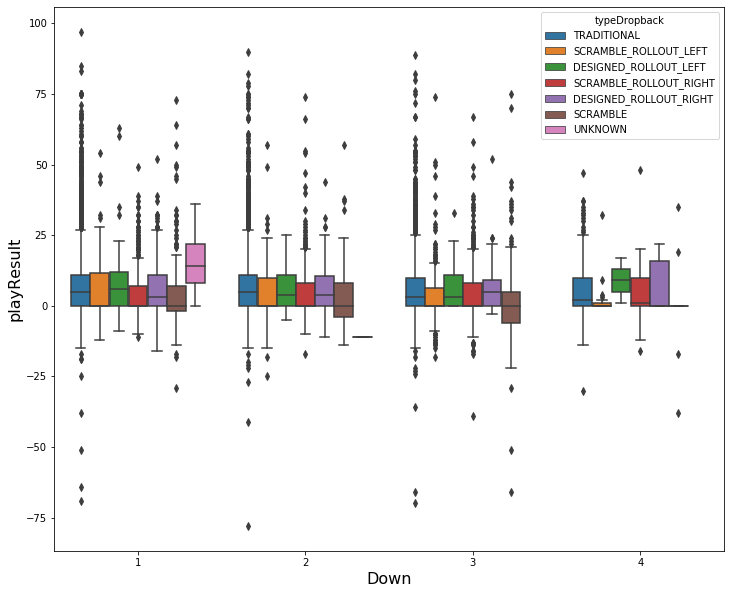

In [51]:
fig,ax = plt.subplots(figsize=(12,10))

sns.boxplot(df_plays['down'],df_plays['playResult'],hue=df_plays['typeDropback'])
plt.xlabel("Down", fontsize = 16)
plt.ylabel("playResult", fontsize = 16)
plt.show()

/home/pedrozamboni/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


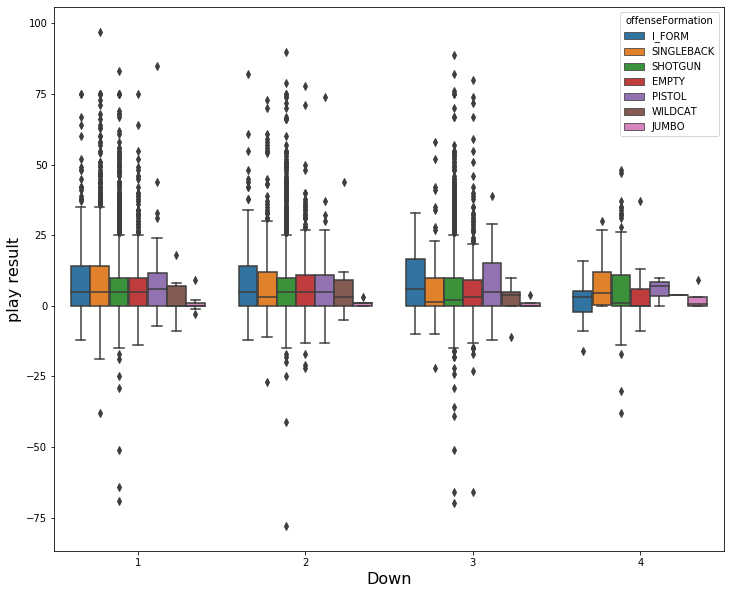

In [52]:
fig,ax = plt.subplots(figsize=(12,10))

sns.boxplot(df_plays['down'],df_plays['playResult'],hue=df_plays['offenseFormation'])
plt.xlabel("Down", fontsize = 16)
plt.ylabel("play result", fontsize = 16)
plt.show()

In [53]:
pd.pivot_table(df_plays, values='playResult', 
                       index=['quarter', 'down'],
                       columns=['possessionTeam'], aggfunc=np.mean)

possessionTeam       ARI       ATL       BAL       BUF        CAR        CHI  \
quarter down                                                                   
1       1       9.027027  6.660714  7.714286  7.604167   6.555556   6.617021   
        2       4.333333  6.909091  6.651163  7.000000   8.034483   8.650000   
        3       4.525000  6.465116  3.305556  4.263158   4.083333   4.843750   
        4       0.000000 -5.000000       NaN       NaN        NaN        NaN   
2       1       4.944444  7.939024  6.534247  4.772727   6.448276   6.745455   
        2       2.789474  9.000000  5.542373  4.435897   8.290909  10.021277   
        3       2.305556  4.943396  6.744681  3.948718   4.705882   5.121212   
        4            NaN       NaN  4.333333  0.000000  19.000000   4.000000   
3       1       6.727273  7.706897  7.727273  6.377778   7.274510   7.836364   
        2       2.685714  5.450000  5.000000  4.270270   4.538462   5.145833   
        3       1.975000  5.636364  7.133333  3.755556   4.225806   3.433333   
        4            NaN  2.000000  3.666667  0.000000   5.500000   1.000000   
4       1       6.364865  8.083333  6.560976  6.342857   6.421687   7.119048   
        2       5.688525  7.196078  4.666667  5.851064   7.042254   9.305556   
        3       4.441860  7.146341  4.000000  3.523810   7.083333   4.843750   
        4       2.272727  7.818182  3.250000  0.600000   5.666667   8.000000   
5       1            NaN       NaN  2.666667       NaN        NaN   6.500000   
        2            NaN       NaN  0.000000       NaN        NaN        NaN   
        3            NaN       NaN  6.800000       NaN        NaN   0.500000   
        4            NaN       NaN  0.000000       NaN        NaN   5.000000   

possessionTeam        CIN        CLE        DAL        DEN  ...       NYG  \
quarter down                                                ...             
1       1        7.700000   6.843137   8.800000   6.085714  ...  8.945946   
        2        7.914894   6.157895   7.157895   5.827586  ...  6.088889   
        3        4.812500   5.421053   5.282051   3.894737  ...  8.416667   
        4        9.500000        NaN        NaN        NaN  ...  0.000000   
2       1        6.208955   8.538462   5.711538   7.948052  ...  5.000000   
        2        3.918367   5.565217   6.000000   3.078431  ...  6.245902   
        3        5.567568   5.840909   4.960000   3.191489  ...  4.423077   
        4       10.000000   9.666667        NaN  -4.000000  ...  9.000000   
3       1        6.557692   5.061224   3.710526   6.659574  ...  7.775000   
        2        4.945946   5.131579   6.853659   7.555556  ...  5.500000   
        3        1.763158   8.461538   5.425000   3.892857  ...  6.861111   
        4        0.000000   5.000000  11.000000  19.000000  ...  3.666667   
4       1        4.963636   8.513889   6.596774   6.726027  ...  6.217949   
        2        9.000000   6.836735   5.767857   7.924528  ...  7.206897   
        3        3.625000   4.861111   5.333333   4.888889  ...  6.037037   
        4        4.285714   9.000000  14.142857   4.846154  ...  4.555556   
5       1             NaN  11.750000  13.500000        NaN  ...  5.000000   
        2             NaN   2.750000   7.500000        NaN  ...       NaN   
        3             NaN   5.444444  13.500000        NaN  ...  4.000000   
        4             NaN   0.000000        NaN        NaN  ...       NaN   

possessionTeam       NYJ        OAK        PHI        PIT        SEA  \
quarter down                                                           
1       1       7.459459   6.770833   5.066667   7.303571   5.714286   
        2       5.323529  10.105263   5.815789   7.686275   7.960000   
        3       4.447368   1.781250   5.055556   8.342105   5.176471   
        4            NaN  15.000000  25.500000        NaN        NaN   
2       1       6.809524   6.369231   7.000000   5.896226   7.734694   
        2       7.051282   6.410714   7.

In [54]:
pd.pivot_table(df_plays, values='playResult', 
                       index=['quarter', 'down'],
                       columns=['playType'], aggfunc=np.mean)

playType      play_type_pass  play_type_sack
quarter down                                
1       1           8.239286       -5.688525
        2           7.497066       -6.306122
        3           6.632487       -7.373984
        4           8.250000       -5.000000
2       1           7.722807       -6.428571
        2           7.079950       -7.425743
        3           6.847808       -7.101351
        4           7.263158       -6.666667
3       1           7.933670       -6.237500
        2           7.317401       -6.215190
        3           7.152791       -7.822034
        4           5.750000      -30.000000
4       1           7.510259       -6.420455
        2           7.719079       -6.726415
        3           6.766636       -7.362963
        4           6.524324      -11.631579
5       1           7.346154       -8.666667
        2           7.000000       -7.428571
        3           8.309524       -5.500000
        4           6.571429             NaN

In [55]:
pd.pivot_table(df_plays, values='playResult', 
                       index=['quarter', 'down'],
                       columns=['typeDropback'], aggfunc=np.mean)

typeDropback  DESIGNED_ROLLOUT_LEFT  DESIGNED_ROLLOUT_RIGHT  SCRAMBLE  \
quarter down                                                            
1       1                  8.750000                7.160000  3.941176   
        2                  7.000000                7.723404  2.730769   
        3                  3.000000               10.571429  0.274510   
        4                  1.000000                     NaN  0.000000   
2       1                 12.928571                5.253968  5.012658   
        2                  9.583333                5.463415  2.140351   
        3                 10.000000                4.000000  2.537313   
        4                       NaN                8.000000  0.000000   
3       1                  5.136364                5.716418  3.653061   
        2                  5.727273                5.424242  1.833333   
        3                 13.750000                7.100000 -1.045455   
        4                       NaN                0.000000  0.000000   
4       1                 11.500000                6.508772  4.703704   
        2                  3.142857                5.931818  2.980000   
        3                  1.250000                7.187500  2.016949   
        4                 17.000000               22.000000 -0.125000   
5       1                       NaN               11.000000 -3.250000   
        2                 -1.000000                8.500000 -2.500000   
        3                       NaN                     NaN  9.000000   
        4                       NaN                     NaN       NaN   

typeDropback  SCRAMBLE_ROLLOUT_LEFT  SCRAMBLE_ROLLOUT_RIGHT  TRADITIONAL  \
quarter down                                                               
1       1                  8.312500                5.597403     7.936561   
        2                  1.812500                5.046875     7.211018   
        3                  2.615385                3.304348     5.534043   
        4                       NaN               12.000000     8.142857   
2       1                  7.489362                3.496000     7.344068   
        2                  4.238095                5.215190     6.449732   
        3                  5.000000                3.516129     5.643357   
        4                  0.000000                2.000000     5.888889   
3       1                  4.035714                3.612903     7.755390   
        2                  5.742857                4.942029     6.892421   
        3                  8.428571                4.417476     6.051031   
        4                  0.500000               19.000000     5.459459   
4       1                  6.348837                5.212963     7.055156   
        2                  5.980392                5.705882     7.053996   
        3                  0.409091                6.439024     5.495618   
        4                  3.428571                4.235294     5.079755   
5       1                 12.000000                5.250000     7.222222   
        2                 11.500000                8.000000     5.000000   
        3                  0.000000               12.400000     6.918919   
        4                       NaN                     NaN     6.571429   

typeDropback  UNKNOWN  
quarter down           
1       1         NaN  
        2         NaN  
        3         NaN  
        4         NaN  
2       1        18.0  
        2         NaN  
        3         NaN  
        4         NaN  
3       1        14.0  
        2       -11.0  
        3         NaN  
        4         NaN  
4       1         NaN  
        2         NaN  
        3         NaN  
        4         NaN  
5       1         NaN  
        2         NaN  
        3         NaN  
        4         NaN

In [56]:
pd.pivot_table(df_plays, values='playResult', 
                       index=['quarter', 'down'],
                       columns=['offenseFormation'], aggfunc=np.mean)

offenseFormation     EMPTY     I_FORM     JUMBO     PISTOL   SHOTGUN  \
quarter down                                                           
1       1         6.329670   9.264706 -0.200000   7.114286  6.200337   
        2         6.266332   9.034091  0.333333   7.928571  6.551618   
        3         5.559322  12.750000  2.500000  11.666667  4.798423   
        4         0.000000        NaN       NaN        NaN  7.727273   
2       1         6.665116   7.343066  0.100000  12.583333  6.519307   
        2         6.883817   6.137255  0.666667   8.318182  5.998264   
        3         5.393939   9.461538  0.200000   6.666667  5.280036   
        4         1.400000  10.500000       NaN   0.000000  6.033333   
3       1         7.962121   8.053333  0.250000   4.458333  6.791304   
        2         6.819383   9.404255  0.500000   5.173913  6.518116   
        3         5.054217   7.583333  0.000000   6.846154  5.676118   
        4         1.285714   5.500000  3.000000  10.000000  5.769231   
4       1         7.465839  10.219780  2.400000  10.200000  6.238932   
        2         5.690000   5.413043  1.333333   6.285714  7.029611   
        3         5.310976   7.846154  1.000000   4.818182  5.121662   
        4         2.791667  -6.000000  1.000000   7.000000  5.083832   
5       1         6.666667        NaN       NaN   9.000000  5.648649   
        2         7.222222  24.000000       NaN   0.000000  4.868421   
        3         5.500000        NaN       NaN        NaN  7.648649   
        4         0.000000        NaN       NaN        NaN  7.666667   

offenseFormation  SINGLEBACK    WILDCAT  
quarter down                             
1       1           9.542373   8.666667  
        2           7.597070  22.000000  
        3           7.400000        NaN  
        4          10.500000        NaN  
2       1           8.519824   0.000000  
        2           6.567686   3.500000  
        3           6.142857   0.500000  
        4           4.600000   4.000000  
3       1           7.465517  -4.000000  
        2           5.548117   6.400000  
        3           5.074074   6.333333  
        4           5.666667        NaN  
4       1           8.904959   4.666667  
        2           6.963636  -2.500000  
        3           7.466667   0.000000  
        4          12.285714        NaN  
5       1           9.750000        NaN  
        2          -1.000000        NaN  
        3           0.000000        NaN  
        4                NaN        NaN

In [61]:
df_def_10=df_plays.loc[df_plays['personnelD'].isin(df_plays.personnelD.value_counts().index[0:10])]
df_off_10=df_plays.loc[df_plays['personnelO'].isin(df_plays.personnelO.value_counts().index[0:10])]

In [65]:
pd.pivot_table(df_off_10, values='playResult', index=['quarter', 'down'],columns=['personnelO'], aggfunc=np.mean)

personnelO    0 RB, 1 TE, 4 WR  1 RB, 0 TE, 4 WR  1 RB, 1 TE, 3 WR  \
quarter down                                                         
1       1             1.500000         18.000000          7.236729   
        2             4.461538          9.625000          6.802276   
        3             4.125000          6.625000          4.953439   
        4                  NaN          0.000000          7.307692   
2       1             5.153846          5.600000          6.818634   
        2             7.500000          3.777778          6.110573   
        3            10.550000          4.969697          5.124456   
        4            -6.000000         13.333333          5.312500   
3       1             4.375000          8.000000          6.890511   
        2             7.826087          8.000000          6.411022   
        3             6.769231          5.193548          5.542194   
        4             0.000000               NaN          5.121212   
4       1             4.428571          3.285714          6.657274   
        2             5.833333          6.560000          6.959042   
        3             6.250000          6.441176          5.001914   
        4             0.000000          6.166667          4.755682   
5       1                  NaN               NaN          5.744186   
        2            10.000000         23.000000          4.250000   
        3                  NaN         20.000000          7.675000   
        4                  NaN               NaN          3.800000   

personnelO    1 RB, 2 TE, 2 WR  1 RB, 3 TE, 1 WR  2 QB, 1 RB, 1 TE, 2 WR  \
quarter down                                                               
1       1             8.022388          8.768116                1.375000   
        2             6.794521          8.755556                9.142857   
        3             6.625000          7.666667                8.666667   
        4            10.666667               NaN                     NaN   
2       1             7.579832          7.839286                6.750000   
        2             7.483193          6.541667                4.750000   
        3             7.289855          8.833333                0.500000   
        4             1.400000               NaN                4.000000   
3       1             7.578804          8.163265                7.200000   
        2             6.118812          7.555556                6.400000   
        3             5.952381          5.750000                6.333333   
        4             9.333333          4.000000                     NaN   
4       1             8.364532          4.782609                1.400000   
        2             6.786982          7.071429                0.500000   
        3             5.323529          7.600000                0.000000   
        4            13.750000         -2.800000                     NaN   
5       1            10.700000          0.000000                     NaN   
        2             8.333333          0.000000                     NaN   
        3             6.000000          0.000000                     NaN   
        4            10.000000         17.000000                     NaN   

personnelO    2 RB, 0 TE, 3 WR  2 RB, 1 TE, 2 WR  2 RB, 2 TE, 1 WR  \
quarter down                                                         
1       1            10.272727          7.934066          6.421053   
        2             3.909091          7.389831         11.300000   
        3             3.300000          6.333333         11.000000   
        4                  NaN               NaN               NaN   
2       1             2.333333          7.854962          8.294118   
        2            10.384615          5.281553          4.600000   
        3             4.357143          3.040000          6.666667   
        4                  NaN               NaN         10.500000   
3       1            10.166667          7.736842          5.083333   
        2       

In [66]:
pd.pivot_table(df_def_10, values='playResult', index=['quarter', 'down'],columns=['personnelD'], aggfunc=np.mean)

personnelD    1 DL, 4 LB, 6 DB  1 DL, 5 LB, 5 DB  2 DL, 3 LB, 6 DB  \
quarter down                                                         
1       1             3.000000               NaN         10.684211   
        2             2.666667         -2.000000          6.310345   
        3             5.351351          5.538462          4.695652   
        4                  NaN               NaN          6.500000   
2       1             6.700000          4.846154          7.056338   
        2             4.571429          9.266667          6.025974   
        3             6.058824          7.000000          6.247863   
        4                  NaN         13.000000         15.000000   
3       1             7.666667               NaN          6.740741   
        2             8.800000          3.500000          7.361111   
        3             3.590909          4.100000          6.576087   
        4             0.000000          7.000000         17.000000   
4       1             4.428571          3.304348          6.408163   
        2             7.545455          6.235294          8.241379   
        3             4.574468          2.979592          5.913043   
        4             1.428571         -2.800000          7.300000   
5       1            42.000000               NaN         12.000000   
        2             0.000000               NaN          0.000000   
        3            12.000000          3.000000          2.500000   
        4             0.000000               NaN               NaN   

personnelD    2 DL, 4 LB, 5 DB  3 DL, 2 LB, 6 DB  3 DL, 3 LB, 5 DB  \
quarter down                                                         
1       1             6.906040          2.428571          7.377551   
        2             5.969136          3.000000          6.813830   
        3             5.428571          4.827338          4.502463   
        4                  NaN               NaN         21.000000   
2       1             7.793860          4.775000          6.517350   
        2             6.378995          7.643836          5.615385   
        3             5.778846          5.567742          4.518349   
        4             8.500000          7.200000         12.000000   
3       1             6.288770          6.083333          6.261062   
        2             6.359606          7.275862          6.488987   
        3             6.537634          7.858268          4.824390   
        4             4.000000          3.500000          8.000000   
4       1             5.598214          7.313131          7.040248   
        2             6.065000          4.800000          7.311741   
        3             4.805556          5.764706          4.822581   
        4             3.526316          8.300000          8.131579   
5       1             7.900000          0.000000          3.157895   
        2             2.555556               NaN          5.450000   
        3             4.333333          7.000000         11.200000   
        4             0.000000               NaN               NaN   

personnelD    3 DL, 4 LB, 4 DB  4 DL, 1 LB, 6 DB  4 DL, 2 LB, 5 DB  \
quarter down                                                         
1       1             9.255814          6.958333          7.358763   
        2             6.764706          6.093750          7.205882   
        3             4.000000          5.990566          5.182371   
        4                  NaN          0.000000          5.222222   
2       1             8.773109          4.666667          7.207232   
        2             7.508475          6.673684          6.067398   
        3             3.600000          4.684211          5.146727   
        4             0.000000          6.500000          2.529412   
3       1             7.398148         10.000000          7.217822   
        2             6.453125          7.558824          6.578755   
        3             5.500000          6.504425          4.914201   
        

In [68]:
pd.pivot_table(df_def_10, index=['defendersInTheBox'],
                                      columns=['passResult'],
                                       values=['offensePlayResult'])

offensePlayResult                    
passResult                        C    I   IN         S
defendersInTheBox                                      
2.0                        7.714286  0.0  NaN       NaN
3.0                       10.220000  0.0  0.0 -7.400000
4.0                       11.111280  0.0  0.0 -6.671642
5.0                       11.327118  0.0  0.0 -6.719008
6.0                       10.886528  0.0  0.0 -6.652727
7.0                       12.085714  0.0  0.0 -6.685039
8.0                       12.758803  0.0  0.0 -6.507692
9.0                        7.606061  0.0  NaN -7.500000

In [69]:
pd.pivot_table(df_def_10, index=['personnelD','numberOfPassRushers'], 
                    columns=['passResult'],
               values=['offensePlayResult'])

offensePlayResult                    
passResult                                           C    I   IN         S
personnelD       numberOfPassRushers                                      
1 DL, 4 LB, 6 DB 0.0                          5.000000  NaN  NaN       NaN
                 2.0                          5.250000  0.0  NaN       NaN
                 3.0                         16.222222  0.0  NaN -9.000000
                 4.0                         11.714286  0.0  0.0 -7.272727
                 5.0                         12.441176  0.0  0.0 -7.714286
...                                                ...  ...  ...       ...
4 DL, 3 LB, 4 DB 4.0                         12.317514  0.0  0.0 -6.350000
                 5.0                         12.810651  0.0  0.0 -5.551724
                 6.0                         14.014493  0.0  0.0 -7.333333
                 7.0                         20.086957  0.0  0.0 -6.000000
                 8.0                          7.500000  NaN  0.0       NaN

[82 rows x 4 columns]

In [85]:
import os
week_list=[]
for i in range(1,18):
    print("open week: ",i)
    df=pd.read_csv(os.path.join('/home/pedrozamboni/Documentos/doutorado/erodes_data_camp/nfl-big-data-bowl-2021/weeks/week'+str(i)+'.csv'))
    week_list.append(df)

open week:  1
open week:  2
open week:  3
open week:  4
open week:  5
open week:  6
open week:  7
open week:  8
open week:  9
open week:  10
open week:  11
open week:  12
open week:  13
open week:  14
open week:  15
open week:  16
open week:  17


In [92]:
df_week=pd.concat(week_list,axis=0)

In [93]:
df_week.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18309388 entries, 0 to 1049264
Data columns (total 19 columns):
 #   Column         Dtype  
---  ------         -----  
 0   time           object 
 1   x              float64
 2   y              float64
 3   s              float64
 4   a              float64
 5   dis            float64
 6   o              float64
 7   dir            float64
 8   event          object 
 9   nflId          float64
 10  displayName    object 
 11  jerseyNumber   float64
 12  position       object 
 13  frameId        int64  
 14  team           object 
 15  gameId         int64  
 16  playId         int64  
 17  playDirection  object 
 18  route          object 
dtypes: float64(9), int64(3), object(7)
memory usage: 2.7+ GB


In [94]:
df_week.isnull().sum().sort_values(ascending = False)/len(df_week)

route            7.204737e-01
o                6.815411e-02
dir              6.815334e-02
position         6.814220e-02
jerseyNumber     6.814220e-02
nflId            6.814220e-02
a                1.529270e-06
dis              5.461679e-08
s                5.461679e-08
frameId          0.000000e+00
team             0.000000e+00
displayName      0.000000e+00
playDirection    0.000000e+00
event            0.000000e+00
gameId           0.000000e+00
playId           0.000000e+00
y                0.000000e+00
x                0.000000e+00
time             0.000000e+00
dtype: float64

In [95]:
df_week = df_week.drop(columns = ['route'])

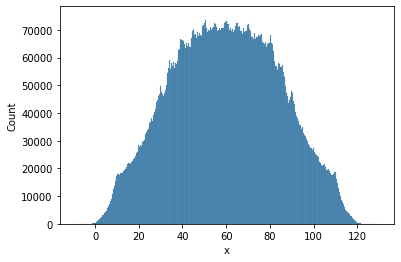

In [96]:
sns.histplot(df_week['x'])

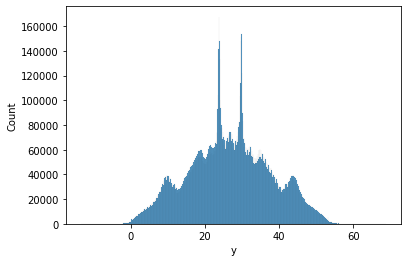

In [97]:
sns.histplot(df_week['y'])

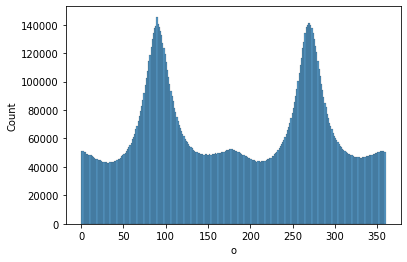

In [103]:
sns.histplot(df_week['o'])

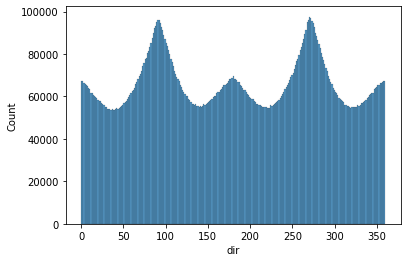

In [104]:
sns.histplot(df_week['dir'])

In [106]:
data = df_week.drop(columns = ['time', 'jerseyNumber'])

In [108]:
data.head()

,x,y,s,a,dis,o,dir,event,nflId,displayName,position,frameId,team,gameId,playId,playDirection
0,91.73,26.67,0.00,0.01,0.02,289.57,240.93,None,310.0,Matt Ryan,QB,1,away,2018090600,75,left
1,88.89,36.47,0.01,0.01,0.01,105.63,66.66,None,79848.0,Malcolm Jenkins,SS,1,home,2018090600,75,left
2,91.35,44.16,0.02,0.03,0.01,290.45,16.86,None,2495454.0,Julio Jones,WR,1,away,2018090600,75,left
3,86.31,22.01,0.09,0.42,0.01,70.12,168.91,None,2495613.0,Corey Graham,FS,1,home,2018090600,75,left
4,90.78,36.15,0.00,0.00,0.00,257.61,193.97,None,2533040.0,Mohamed Sanu,WR,1,away,2018090600,75,left


In [109]:
df_games

,gameId,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,week
0,2018090600,09/06/2018,20:20:00,PHI,ATL,1
1,2018090901,09/09/2018,13:00:00,CLE,PIT,1
2,2018090902,09/09/2018,13:00:00,IND,CIN,1
3,2018090903,09/09/2018,13:00:00,MIA,TEN,1
4,2018090900,09/09/2018,13:00:00,BAL,BUF,1
...,...,...,...,...,...,...
248,2018123013,12/30/2018,16:25:00,DEN,LAC,17
249,2018123015,12/30/2018,16:25:00,SEA,ARI,17
250,2018123014,12/30/2018,16:25:00,LA,SF,17
251,2018122200,12/22/2018,16:30:00,TEN,WAS,16


In [ ]:
data

In [ ]:
data = pd.merge(data, df_games[['gameId', 'homeTeamAbbr', 'visitorTeamAbbr']], how = 'inner', on = 'gameId')
data.team = data.apply(lambda x: x.homeTeamAbbr if x.team == 'home' else x.visitorTeamAbbr, axis = 1)
data = data.drop(columns = ['homeTeamAbbr', 'visitorTeamAbbr'])

In [ ]:
data.head()